In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.0 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
data = pd.read_csv('pd_speech_features.csv')
data


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['class'] = df['class'].astype(int)

In [ ]:
col_name = 'class'
col_data = [col_name]
num_zeros = (df['class'] == 0).sum()
num_ones = (df['class']  == 1).sum()
print("Number of zeros in column '%s': %d" % (col_name, num_zeros))
print("Number of ones in column '%s': %d" % (col_name, num_ones))

Number of zeros in column 'class': 192
Number of ones in column 'class': 564


In [ ]:
X = data.drop(columns=['class'])
y = data['class']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data = scaler.fit_transform(data)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# assume that you have an imbalanced dataframe df with the target variable 'y'

# define the RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# perform random oversampling on the dataset
X, y = oversampler.fit_resample(X, y)

# create a new dataframe for the resampled data
resampled_df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

# print the number of samples in each class before and after oversampling
print('Original dataset shape:', data.shape)
print('Resampled dataset shape:', resampled_df.shape)
#print('Original class distribution:\n', data['y'].value_counts())
#print('Resampled class distribution:\n', resampled_df['y'].value_counts())


Original dataset shape: (756, 755)
Resampled dataset shape: (1128, 755)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# create a logistic regression classifier and fit it on the training set
lr = LogisticRegression()
lr.fit(X_train, y_train)

# make predictions on the test set
y_pred = lr.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 3:", accuracy)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print("RMSE 3:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


Accuracy 3: 0.6460176991150443
RMSE 3: 0.5949641173087296
MSE: 0.35398230088495575
MAE: 0.35398230088495575


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# create a decision tree classifier and fit it on the training set
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# make predictions on the test set
y_pred = dtc.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 4:", accuracy)
# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 4:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 4:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 4:", mae)

Accuracy 4: 0.8982300884955752
RMSE 4: 0.3190139675694856
MSE 4: 0.10176991150442478
MAE 4: 0.10176991150442478


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your dataset is stored in a Pandas dataframe called `df` with target variable 'class'
X = df.drop('class', axis=1)
y = df['class']

# Train the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict on the test set and evaluate accuracy
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy 5:', accuracy)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 5:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 5 :", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 5:", mae)

Accuracy 5: 0.9247787610619469
RMSE 5: 0.27426490650109264
MSE 5 : 0.0752212389380531
MAE 5: 0.0752212389380531


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# create a Kernel SVM classifier and fit it on the training set
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# make predictions on the test set
y_pred = svc.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 6 :", accuracy)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 6:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 6:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 6:", mae)

Accuracy 6 : 0.6415929203539823
RMSE 6: 0.5986710947139654
MSE 6: 0.3584070796460177
MAE 6: 0.3584070796460177


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create a Gaussian Naïve Bayes classifier and fit it on the training set
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# make predictions on the test set
y_pred = gnb.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 7:", accuracy)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 7:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 7:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 7:", mae)

Accuracy 7: 0.6106194690265486
RMSE 7: 0.6240036305771396
MSE 7: 0.3893805309734513
MAE 7: 0.3893805309734513


In [ ]:

# Train an XGBoost classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)
param = {'max_depth': 3, 'eta': 0.1, 'objective': 'binary:logistic', 'eval_metric': 'error'}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

# Make predictions on the test set
y_pred = bst.predict(dtest)
# Convert probabilities to binary predictions
y_pred_binary = [round(pred) for pred in y_pred]

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Accuracy 8: {accuracy}")

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print("RMSE 8:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 8:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 8:", mae)

Accuracy 8: 0.9557522123893806
RMSE 8: 0.19579713528860115
MSE 8: 0.03833651818722278
MAE 8: 0.10210186641444906


In [ ]:


# Train a CATBoost classifier
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, loss_function='Logloss')
clf.fit(X_train, y_train, verbose=False)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy 9: {accuracy}")

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 9:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 9:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 9:", mae)

Accuracy 9: 0.9557522123893806
RMSE 9: 0.21035158095583562
MSE 9: 0.04424778761061947
MAE 9: 0.04424778761061947


In [ ]:
#KNN


# create a KNN classifier and fit it on the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# make predictions on the test set
y_pred = knn.predict(X_test)

# evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy 10:", accuracy)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 10:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 10:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 10:", mae)

Accuracy 10: 0.7300884955752213
RMSE 10: 0.5195300803849366
MSE 10: 0.26991150442477874
MAE 10: 0.26991150442477874


In [ ]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train a LightGBM classifier
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}
train_data = lgb.Dataset(X_train, label=y_train)
model = lgb.train(params, train_data, num_boost_round=100)

# Evaluate accuracy on test set
y_pred = model.predict(X_test)
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]  # convert probabilities to binary predictions
accuracy = accuracy_score(y_test, y_pred_binary)

print('Accuracy 11:', accuracy)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# calculate the root mean squared error
rmse = np.sqrt(mse)

print("RMSE 11:", rmse)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE 11:", mse)

# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("MAE 11:", mae)

[LightGBM] [Info] Number of positive: 447, number of negative: 455
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189999
[LightGBM] [Info] Number of data points in the train set: 902, number of used features: 754
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495565 -> initscore=-0.017739
[LightGBM] [Info] Start training from score -0.017739
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy 11: 0.9469026548672567
RMSE 11: 0.18846931223930563
MSE 11: 0.03552068165595688
MAE 11: 0.08206993016108372


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create multiple Random Forest classifiers
num_classifiers = 5
classifiers = []
for _ in range(num_classifiers):
    # Create and train a Random Forest classifier
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(X_train, y_train)
    classifiers.append(classifier)

# Make predictions on the test set using each classifier
predictions = []
for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    predictions.append(y_pred)

# Voting ensemble: Aggregate predictions using majority voting
ensemble_predictions = []
for i in range(len(X_test)):
    votes = [predictions[j][i] for j in range(num_classifiers)]
    majority_vote = max(set(votes), key=votes.count)
    ensemble_predictions.append(majority_vote)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9469026548672567


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create multiple CatBoost classifiers
num_classifiers = 5
classifiers = []
for _ in range(num_classifiers):
    # Create and train a CatBoost classifier
    classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
    classifier.fit(X_train, y_train, verbose=False)
    classifiers.append(classifier)

# Make predictions on the test set using each classifier
predictions = []
for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    predictions.append(y_pred)

# Voting ensemble: Aggregate predictions using majority voting
ensemble_predictions = []
for i in range(len(X_test)):
    votes = [predictions[j][i] for j in range(num_classifiers)]
    majority_vote = max(set(votes), key=votes.count)
    ensemble_predictions.append(majority_vote)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9557522123893806


In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier.fit(X_train, y_train)

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
catboost_classifier.fit(X_train, y_train, verbose=False)

# Make predictions on the test set using each classifier
xgb_predictions = xgb_classifier.predict(X_test)
catboost_predictions = catboost_classifier.predict(X_test)

# Combine predictions using voting or averaging
ensemble_predictions = (xgb_predictions + catboost_predictions) / 2

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9646017699115044


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train, y_train)

# Create XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier.fit(X_train, y_train)

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
catboost_classifier.fit(X_train, y_train, verbose=False)

# Make predictions on the test set using each classifier
random_forest_predictions = random_forest_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
catboost_predictions = catboost_classifier.predict(X_test)

# Combine predictions using voting or averaging
ensemble_predictions = (random_forest_predictions + xgb_predictions + catboost_predictions) / 3

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9469026548672567


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)

# Create LightGBM classifier
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)

# Create VotingClassifier with 'soft' voting
voting_classifier = VotingClassifier(
    estimators=[
        ('catboost', catboost_classifier),
        ('lgbm', lgbm_classifier)
    ],
    voting='soft'
)

# Fit the VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = voting_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


0:	learn: 0.6191890	total: 251ms	remaining: 24.8s
1:	learn: 0.5743202	total: 427ms	remaining: 20.9s
2:	learn: 0.5280268	total: 624ms	remaining: 20.2s
3:	learn: 0.4859936	total: 812ms	remaining: 19.5s
4:	learn: 0.4508148	total: 1s	remaining: 19.1s
5:	learn: 0.4139000	total: 1.19s	remaining: 18.7s
6:	learn: 0.3809954	total: 1.38s	remaining: 18.4s
7:	learn: 0.3569513	total: 1.56s	remaining: 18s
8:	learn: 0.3374071	total: 1.77s	remaining: 17.9s
9:	learn: 0.3185414	total: 1.95s	remaining: 17.6s
10:	learn: 0.3001878	total: 2.17s	remaining: 17.5s
11:	learn: 0.2829977	total: 2.5s	remaining: 18.3s
12:	learn: 0.2624388	total: 2.83s	remaining: 19s
13:	learn: 0.2536887	total: 3.18s	remaining: 19.5s
14:	learn: 0.2466589	total: 3.54s	remaining: 20.1s
15:	learn: 0.2329963	total: 3.89s	remaining: 20.4s
16:	learn: 0.2235171	total: 4.24s	remaining: 20.7s
17:	learn: 0.2145817	total: 4.55s	remaining: 20.8s
18:	learn: 0.2082387	total: 4.88s	remaining: 20.8s
19:	learn: 0.1991494	total: 5.11s	remaining: 20.5

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=6)

# Fit each base model individually
catboost_classifier.fit(X_train, y_train)
lgbm_classifier.fit(X_train, y_train)
xgb_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set using each base model
catboost_predictions = catboost_classifier.predict(X_test)
lgbm_predictions = lgbm_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

# Aggregate the predictions using voting or averaging
ensemble_predictions = (catboost_predictions + lgbm_predictions + xgb_predictions + rf_predictions) / 4

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


0:	learn: 0.6191890	total: 260ms	remaining: 25.7s
1:	learn: 0.5743202	total: 440ms	remaining: 21.5s
2:	learn: 0.5280268	total: 629ms	remaining: 20.3s
3:	learn: 0.4859936	total: 811ms	remaining: 19.5s
4:	learn: 0.4508148	total: 1.01s	remaining: 19.2s
5:	learn: 0.4139000	total: 1.2s	remaining: 18.8s
6:	learn: 0.3809954	total: 1.39s	remaining: 18.5s
7:	learn: 0.3569513	total: 1.58s	remaining: 18.2s
8:	learn: 0.3374071	total: 1.77s	remaining: 17.9s
9:	learn: 0.3185414	total: 2.04s	remaining: 18.4s
10:	learn: 0.3001878	total: 2.4s	remaining: 19.4s
11:	learn: 0.2829977	total: 2.76s	remaining: 20.2s
12:	learn: 0.2624388	total: 3.11s	remaining: 20.8s
13:	learn: 0.2536887	total: 3.47s	remaining: 21.3s
14:	learn: 0.2466589	total: 3.82s	remaining: 21.6s
15:	learn: 0.2329963	total: 4.17s	remaining: 21.9s
16:	learn: 0.2235171	total: 4.48s	remaining: 21.9s
17:	learn: 0.2145817	total: 4.74s	remaining: 21.6s
18:	learn: 0.2082387	total: 4.92s	remaining: 21s
19:	learn: 0.1991494	total: 5.1s	remaining: 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=6)

# Create the stacking ensemble
estimators = [
    ('catboost', catboost_classifier),
    ('lgbm', lgbm_classifier),
    ('xgb', xgb_classifier),
    ('rf', rf_classifier)
]

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(n_estimators=100, max_depth=6)
)

# Fit the stacking ensemble on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = stacking_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


0:	learn: 0.6191890	total: 494ms	remaining: 48.9s
1:	learn: 0.5743202	total: 871ms	remaining: 42.7s
2:	learn: 0.5280268	total: 1.23s	remaining: 39.7s
3:	learn: 0.4859936	total: 1.54s	remaining: 37.1s
4:	learn: 0.4508148	total: 1.79s	remaining: 34s
5:	learn: 0.4139000	total: 2.06s	remaining: 32.2s
6:	learn: 0.3809954	total: 2.34s	remaining: 31.1s
7:	learn: 0.3569513	total: 2.58s	remaining: 29.6s
8:	learn: 0.3374071	total: 2.92s	remaining: 29.5s
9:	learn: 0.3185414	total: 3.18s	remaining: 28.6s
10:	learn: 0.3001878	total: 3.41s	remaining: 27.6s
11:	learn: 0.2829977	total: 3.67s	remaining: 26.9s
12:	learn: 0.2624388	total: 3.87s	remaining: 25.9s
13:	learn: 0.2536887	total: 4.12s	remaining: 25.3s
14:	learn: 0.2466589	total: 4.35s	remaining: 24.7s
15:	learn: 0.2329963	total: 4.6s	remaining: 24.2s
16:	learn: 0.2235171	total: 5.01s	remaining: 24.4s
17:	learn: 0.2145817	total: 5.28s	remaining: 24s
18:	learn: 0.2082387	total: 5.48s	remaining: 23.4s
19:	learn: 0.1991494	total: 5.61s	remaining: 2

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=6)

# Create the bagging ensemble
bagging_classifier = BaggingClassifier(
    base_estimator=catboost_classifier,  # Use CatBoost as the base estimator
    n_estimators=10,  # Number of base models in the ensemble
    random_state=42
)

# Fit the bagging ensemble on the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = bagging_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 0.6131085	total: 154ms	remaining: 15.3s
1:	learn: 0.5456805	total: 282ms	remaining: 13.8s
2:	learn: 0.4874684	total: 411ms	remaining: 13.3s
3:	learn: 0.4524062	total: 533ms	remaining: 12.8s
4:	learn: 0.4199919	total: 663ms	remaining: 12.6s
5:	learn: 0.3909771	total: 790ms	remaining: 12.4s
6:	learn: 0.3710842	total: 920ms	remaining: 12.2s
7:	learn: 0.3419978	total: 1.04s	remaining: 12s
8:	learn: 0.3197354	total: 1.18s	remaining: 11.9s
9:	learn: 0.2938587	total: 1.3s	remaining: 11.7s
10:	learn: 0.2764789	total: 1.45s	remaining: 11.8s
11:	learn: 0.2635331	total: 1.57s	remaining: 11.5s
12:	learn: 0.2443041	total: 1.69s	remaining: 11.3s
13:	learn: 0.2317504	total: 1.89s	remaining: 11.6s
14:	learn: 0.2174705	total: 2.11s	remaining: 12s
15:	learn: 0.2053617	total: 2.34s	remaining: 12.3s
16:	learn: 0.1967410	total: 2.56s	remaining: 12.5s
17:	learn: 0.1874602	total: 2.79s	remaining: 12.7s
18:	learn: 0.1818017	total: 3.01s	remaining: 12.8s
19:	learn: 0.1746897	total: 3.24s	remaining: 1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train, y_train)

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
catboost_classifier.fit(X_train, y_train, verbose=False)

# Make predictions on the test set using each classifier
random_forest_predictions = random_forest_classifier.predict(X_test)
catboost_predictions = catboost_classifier.predict(X_test)

# Combine predictions using voting or averaging
ensemble_predictions = (random_forest_predictions + catboost_predictions) / 2

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9601769911504425


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train, y_train)

# Create XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set using each classifier
random_forest_predictions = random_forest_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

# Combine predictions using voting or averaging
ensemble_predictions = (random_forest_predictions + xgb_predictions) / 2

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9469026548672567


In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
catboost_classifier.fit(X_train, y_train, verbose=False)

# Create XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set using each classifier
catboost_predictions = catboost_classifier.predict(X_test)
xgb_predictions = xgb_classifier.predict(X_test)

# Combine predictions using boosting
ensemble_predictions = catboost_predictions + xgb_predictions

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 1 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9646017699115044


In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)

# Create stacking classifier
estimators = [
    ('catboost', catboost_classifier),
    ('lgbm', lgbm_classifier),
    ('xgboost', xgb_classifier)
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=CatBoostClassifier())

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(X_test)

# Evaluate the stacking model
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Accuracy:", stacking_accuracy)


0:	learn: 0.6191890	total: 383ms	remaining: 37.9s
1:	learn: 0.5743202	total: 768ms	remaining: 37.6s
2:	learn: 0.5280268	total: 1.18s	remaining: 38.3s
3:	learn: 0.4859936	total: 1.65s	remaining: 39.7s
4:	learn: 0.4508148	total: 2.06s	remaining: 39.1s
5:	learn: 0.4139000	total: 2.35s	remaining: 36.9s
6:	learn: 0.3809954	total: 2.59s	remaining: 34.4s
7:	learn: 0.3569513	total: 2.82s	remaining: 32.4s
8:	learn: 0.3374071	total: 3.04s	remaining: 30.8s
9:	learn: 0.3185414	total: 3.27s	remaining: 29.5s
10:	learn: 0.3001878	total: 3.49s	remaining: 28.2s
11:	learn: 0.2829977	total: 3.73s	remaining: 27.4s
12:	learn: 0.2624388	total: 3.96s	remaining: 26.5s
13:	learn: 0.2536887	total: 4.23s	remaining: 26s
14:	learn: 0.2466589	total: 4.48s	remaining: 25.4s
15:	learn: 0.2329963	total: 4.73s	remaining: 24.8s
16:	learn: 0.2235171	total: 4.96s	remaining: 24.2s
17:	learn: 0.2145817	total: 5.21s	remaining: 23.7s
18:	learn: 0.2082387	total: 5.49s	remaining: 23.4s
19:	learn: 0.1991494	total: 5.74s	remaining

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)

# Create bagging classifier
bagging_classifier_xgb = BaggingClassifier(base_estimator=xgb_classifier, n_estimators=10)
bagging_classifier_catboost = BaggingClassifier(base_estimator=catboost_classifier, n_estimators=10)

# Train the bagging classifiers
bagging_classifier_xgb.fit(X_train, y_train)
bagging_classifier_catboost.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = bagging_classifier_xgb.predict(X_test)
catboost_predictions = bagging_classifier_catboost.predict(X_test)

# Combine predictions (e.g., through majority voting or averaging)
ensemble_predictions = (xgb_predictions + catboost_predictions) / 2

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 0.6322746	total: 231ms	remaining: 22.8s
1:	learn: 0.5741150	total: 358ms	remaining: 17.6s
2:	learn: 0.5170429	total: 486ms	remaining: 15.7s
3:	learn: 0.4737990	total: 605ms	remaining: 14.5s
4:	learn: 0.4305889	total: 726ms	remaining: 13.8s
5:	learn: 0.3932677	total: 845ms	remaining: 13.2s
6:	learn: 0.3746478	total: 974ms	remaining: 12.9s
7:	learn: 0.3522007	total: 1.09s	remaining: 12.6s
8:	learn: 0.3329308	total: 1.22s	remaining: 12.3s
9:	learn: 0.3160020	total: 1.35s	remaining: 12.1s
10:	learn: 0.2956890	total: 1.47s	remaining: 11.9s
11:	learn: 0.2796375	total: 1.59s	remaining: 11.7s
12:	learn: 0.2654467	total: 1.72s	remaining: 11.5s
13:	learn: 0.2508494	total: 1.83s	remaining: 11.3s
14:	learn: 0.2413459	total: 1.96s	remaining: 11.1s
15:	learn: 0.2273743	total: 2.08s	remaining: 10.9s
16:	learn: 0.2168950	total: 2.2s	remaining: 10.8s
17:	learn: 0.2046049	total: 2.34s	remaining: 10.6s
18:	learn: 0.1952825	total: 2.46s	remaining: 10.5s
19:	learn: 0.1886473	total: 2.58s	remainin

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)

# Train base models
xgb_classifier.fit(X_train, y_train)
catboost_classifier.fit(X_train, y_train, verbose=False)
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set using base models
xgb_predictions = xgb_classifier.predict(X_test)
catboost_predictions = catboost_classifier.predict(X_test)
lgbm_predictions = lgbm_classifier.predict(X_test)

# Combine predictions using boosting (e.g., weighted voting or averaging)
ensemble_predictions = (0.4 * xgb_predictions + 0.4 * catboost_predictions + 0.2 * lgbm_predictions)

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9469026548672567


In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=6)

# Combine base models into a VotingClassifier using soft voting
voting_classifier = VotingClassifier(
    estimators=[
        ('xgb', xgb_classifier),
        ('catboost', catboost_classifier),
        ('lgbm', lgbm_classifier),
        ('rf', rf_classifier)
    ],
    voting='soft'
)

# Train the voting classifier
voting_classifier.fit(X_train, y_train)

# Make predictions on the test set
ensemble_predictions = voting_classifier.predict(X_test)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


0:	learn: 0.6191890	total: 148ms	remaining: 14.7s
1:	learn: 0.5743202	total: 266ms	remaining: 13s
2:	learn: 0.5280268	total: 386ms	remaining: 12.5s
3:	learn: 0.4859936	total: 512ms	remaining: 12.3s
4:	learn: 0.4508148	total: 634ms	remaining: 12s
5:	learn: 0.4139000	total: 763ms	remaining: 12s
6:	learn: 0.3809954	total: 887ms	remaining: 11.8s
7:	learn: 0.3569513	total: 1.01s	remaining: 11.6s
8:	learn: 0.3374071	total: 1.13s	remaining: 11.5s
9:	learn: 0.3185414	total: 1.26s	remaining: 11.3s
10:	learn: 0.3001878	total: 1.38s	remaining: 11.2s
11:	learn: 0.2829977	total: 1.51s	remaining: 11.1s
12:	learn: 0.2624388	total: 1.63s	remaining: 10.9s
13:	learn: 0.2536887	total: 1.76s	remaining: 10.8s
14:	learn: 0.2466589	total: 1.89s	remaining: 10.7s
15:	learn: 0.2329963	total: 2.01s	remaining: 10.5s
16:	learn: 0.2235171	total: 2.13s	remaining: 10.4s
17:	learn: 0.2145817	total: 2.25s	remaining: 10.2s
18:	learn: 0.2082387	total: 2.37s	remaining: 10.1s
19:	learn: 0.1991494	total: 2.5s	remaining: 9.9

In [ ]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and split it into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create base models
xgb_classifier = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
catboost_classifier = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1)
lgbm_classifier = LGBMClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=6)

# Fit the AdaBoost classifier for each base model
adaboost_xgb = AdaBoostClassifier(base_estimator=xgb_classifier, n_estimators=100, learning_rate=1.0)
adaboost_catboost = AdaBoostClassifier(base_estimator=catboost_classifier, n_estimators=100, learning_rate=1.0)
adaboost_lgbm = AdaBoostClassifier(base_estimator=lgbm_classifier, n_estimators=100, learning_rate=1.0)
adaboost_rf = AdaBoostClassifier(base_estimator=rf_classifier, n_estimators=100, learning_rate=1.0)

# Fit the AdaBoost classifiers with the training data
adaboost_xgb.fit(X_train, y_train)
adaboost_catboost.fit(X_train, y_train)
adaboost_lgbm.fit(X_train, y_train)
adaboost_rf.fit(X_train, y_train)

# Make predictions on the test set using each AdaBoost classifier
xgb_predictions = adaboost_xgb.predict(X_test)
catboost_predictions = adaboost_catboost.predict(X_test)
lgbm_predictions = adaboost_lgbm.predict(X_test)
rf_predictions = adaboost_rf.predict(X_test)

# Aggregate the predictions using voting or averaging
ensemble_predictions = (xgb_predictions + catboost_predictions + lgbm_predictions + rf_predictions) / 4

# Convert the ensemble predictions to binary classes (if applicable)
ensemble_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression RMSE: 0.5193619567365935
Decision Tree RMSE: 0.45883146774112354
Random Forest RMSE: 0.34412360080584264
SVM RMSE: 0.512989176042577
Naive Bayes RMSE: 0.5848976518656018
XGBoost RMSE: 0.3716959708375141
Learning rate set to 0.008307
0:	learn: 0.6881154	total: 258ms	remaining: 4m 18s
1:	learn: 0.6814876	total: 452ms	remaining: 3m 45s
2:	learn: 0.6746173	total: 637ms	remaining: 3m 31s
3:	learn: 0.6685545	total: 815ms	remaining: 3m 22s
4:	learn: 0.6613401	total: 1s	remaining: 3m 19s
5:	learn: 0.6545873	total: 1.18s	remaining: 3m 15s
6:	learn: 0.6492838	total: 1.37s	remaining: 3m 14s
7:	learn: 0.6436247	total: 1.56s	remaining: 3m 13s
8:	learn: 0.6374200	total: 1.75s	remaining: 3m 13s
9:	learn: 0.6327026	total: 1.94s	remaining: 3m 11s
10:	learn: 0.6273909	total: 2.12s	remaining: 3m 10s
11:	learn: 0.6228592	total: 2.3s	remaining: 3m 9s
12:	learn: 0.6176516	total: 2.5s	remaining: 3m 10s
13:	learn: 0.6122588	total: 2.69s	remaining: 3m 9s
14:	learn: 0.6086631	total: 2.88s	re

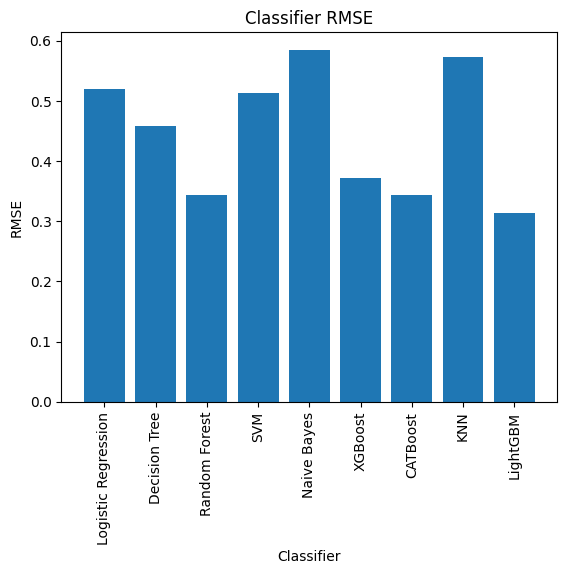

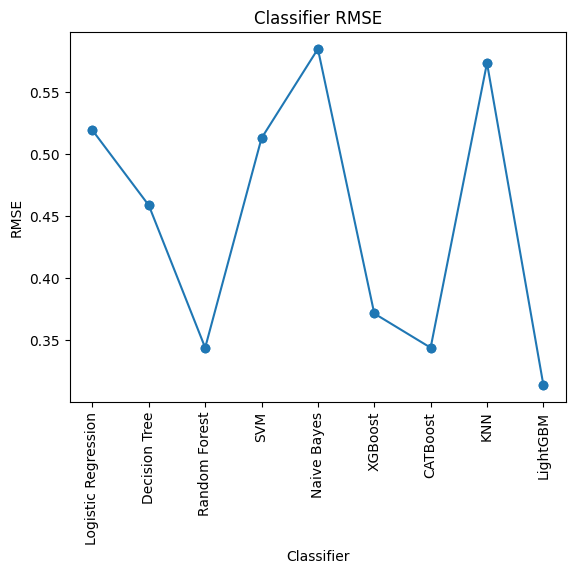

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Create a list of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CATBoost': CatBoostClassifier(),
    'KNN': KNeighborsClassifier(),
    'LightGBM': LGBMClassifier()
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list to store RMSEs for each classifier
RMSEs = []

# Loop through each classifier
for clf_name, clf in classifiers.items():
    # Fit the classifier on the training set
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the RMSE of the classifier
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Append the RMSE to the list of RMSEs
    RMSEs.append(rmse)
    # Print the classifier name and its RMSE
    print(clf_name, 'RMSE:', rmse)

# Create a bar chart to visualize the RMSEs of each classifier
plt.bar(classifiers.keys(), RMSEs)
plt.xlabel('Classifier')
plt.ylabel('RMSE')
plt.title('Classifier RMSE')
plt.xticks(rotation=90)
plt.show()

# Create a scatter plot
plt.scatter(list(classifiers.keys()), RMSEs)

# Add a line connecting the points
plt.plot(list(classifiers.keys()), RMSEs, '-o')

# Add axis labels and title
plt.xlabel('Classifier')
plt.ylabel('RMSE')
plt.title('Classifier RMSE')
plt.xticks(rotation=90)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression MSE: 0.26973684210526316
Decision Tree MSE: 0.21710526315789475
Random Forest MSE: 0.14473684210526316
SVM MSE: 0.2631578947368421
Naive Bayes MSE: 0.34210526315789475
XGBoost MSE: 0.13815789473684212
Learning rate set to 0.008307
0:	learn: 0.6881154	total: 264ms	remaining: 4m 23s
1:	learn: 0.6814876	total: 449ms	remaining: 3m 44s
2:	learn: 0.6746173	total: 633ms	remaining: 3m 30s
3:	learn: 0.6685545	total: 817ms	remaining: 3m 23s
4:	learn: 0.6613401	total: 997ms	remaining: 3m 18s
5:	learn: 0.6545873	total: 1.17s	remaining: 3m 14s
6:	learn: 0.6492838	total: 1.37s	remaining: 3m 15s
7:	learn: 0.6436247	total: 1.56s	remaining: 3m 13s
8:	learn: 0.6374200	total: 1.74s	remaining: 3m 11s
9:	learn: 0.6327026	total: 1.93s	remaining: 3m 10s
10:	learn: 0.6273909	total: 2.11s	remaining: 3m 9s
11:	learn: 0.6228592	total: 2.31s	remaining: 3m 10s
12:	learn: 0.6176516	total: 2.49s	remaining: 3m 9s
13:	learn: 0.6122588	total: 2.68s	remaining: 3m 8s
14:	learn: 0.6086631	total: 2.87s	

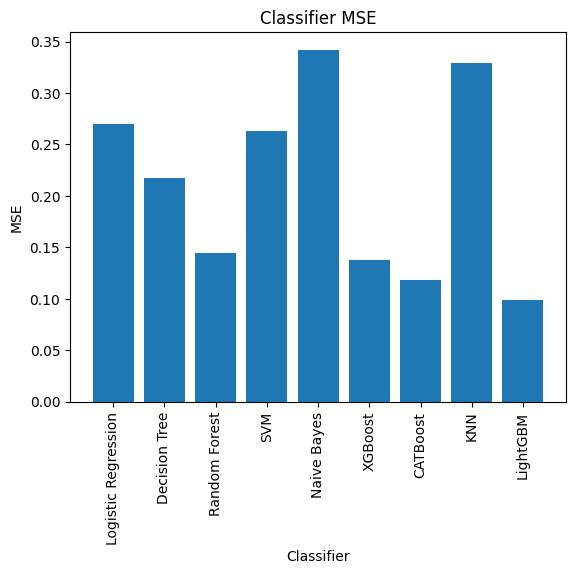

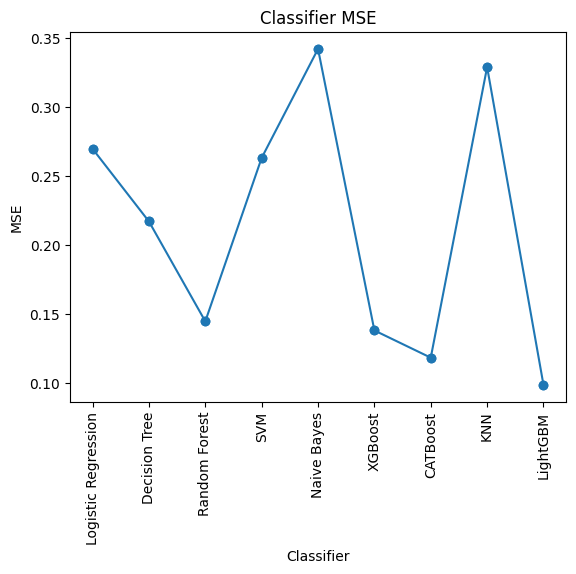

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier()),
    ('CATBoost', CatBoostClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LightGBM', LGBMClassifier())
]

classifiers_names = [name for name, _ in classifiers]
mses = []

# Loop through each classifier
for clf_name, clf in classifiers:
    # Fit the classifier on the training set
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the MSE of the classifier
    mse = mean_squared_error(y_test, y_pred)
    # Append the MSE to the list of MSEs
    mses.append(mse)
    # Print the classifier name and its MSE
    print(clf_name, 'MSE:', mse)

# Create a bar chart to visualize the MSEs of each classifier
plt.bar(classifiers_names, mses)
plt.xlabel('Classifier')
plt.ylabel('MSE')
plt.title('Classifier MSE')
plt.xticks(rotation=90)
plt.show()

# Create a scatter plot
plt.scatter(classifiers_names, mses)

# Add a line connecting the points
plt.plot(classifiers_names, mses, '-o')

# Add axis labels and title
plt.xlabel('Classifier')
plt.ylabel('MSE')
plt.title('Classifier MSE')
plt.xticks(rotation=90)

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression MAE: 0.26973684210526316
Decision Tree MAE: 0.2236842105263158
Random Forest MAE: 0.13157894736842105
SVM MAE: 0.2631578947368421
Naive Bayes MAE: 0.34210526315789475
XGBoost MAE: 0.13815789473684212
Learning rate set to 0.008307
0:	learn: 0.6881154	total: 438ms	remaining: 7m 17s
1:	learn: 0.6814876	total: 770ms	remaining: 6m 24s
2:	learn: 0.6746173	total: 1.08s	remaining: 6m
3:	learn: 0.6685545	total: 1.43s	remaining: 5m 56s
4:	learn: 0.6613401	total: 1.77s	remaining: 5m 52s
5:	learn: 0.6545873	total: 2.11s	remaining: 5m 48s
6:	learn: 0.6492838	total: 2.43s	remaining: 5m 45s
7:	learn: 0.6436247	total: 2.66s	remaining: 5m 29s
8:	learn: 0.6374200	total: 2.85s	remaining: 5m 13s
9:	learn: 0.6327026	total: 3.03s	remaining: 4m 59s
10:	learn: 0.6273909	total: 3.22s	remaining: 4m 49s
11:	learn: 0.6228592	total: 3.4s	remaining: 4m 40s
12:	learn: 0.6176516	total: 3.61s	remaining: 4m 33s
13:	learn: 0.6122588	total: 3.81s	remaining: 4m 28s
14:	learn: 0.6086631	total: 3.99s	rem

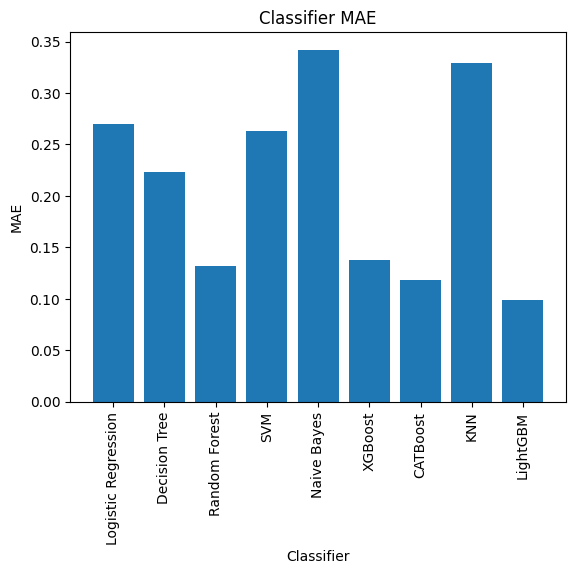

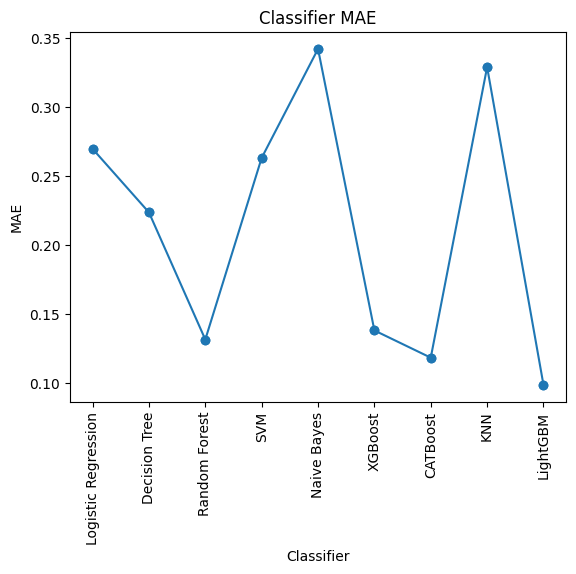

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Create a list of classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('XGBoost', XGBClassifier()),
    ('CATBoost', CatBoostClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('LightGBM', LGBMClassifier())
]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list to store MAEs for each classifier
maes = []

# Loop through each classifier
for clf_name, clf in classifiers:
    # Fit the classifier on the training set
    clf.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    # Calculate the MAE of the classifier
    mae = mean_absolute_error(y_test, y_pred)
    # Append the MAE to the list of MAEs
    maes.append(mae)
    # Print the classifier name and its MAE
    print(clf_name, 'MAE:', mae)

# Create a bar chart to visualize the MAEs of each classifier
plt.bar([name for name, _ in classifiers], maes)
plt.xlabel('Classifier')
plt.ylabel('MAE')
plt.title('Classifier MAE')
plt.xticks(rotation=90)
plt.show()

# Create a scatter plot
plt.scatter([name for name, _ in classifiers], maes)

# Add a line connecting the points
plt.plot([name for name, _ in classifiers], maes, '-o')

# Add axis labels and title
plt.xlabel('Classifier')
plt.ylabel('MAE')
plt.title('Classifier MAE')
plt.xticks(rotation=90)

# Show the plot
plt.show()
